## Check installation and import modules

In [1]:
%matplotlib inline

from osgeo import gdal
print("Using gdal version", gdal.__version__)
import pywapor
print("Using pywapor version:", pywapor.__version__)
import xarray as xr
print("Using xarray version:", xr.__version__)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rioxarray
import rasterio.crs as crs_r
from functools import partial
import pywapor.se_root as se_root
import glob
import os

Using gdal version 3.7.0


/Users/micky/anaconda3/envs/test_pywapor/lib/python3.11/site-packages/pywapor/enhancers/smooth/core.py:21: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  v = np.where(Y > Z, a_, 1 - a_)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/micky/anaconda3/envs/test_pywapor/lib/python3.11/site-packages/pywapor/enhancers/smooth/core.py:128: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  Y_ = np.where(w == 0, 0, Y)


Using pywapor version: 3.3.5
Using xarray version: 2023.5.0


## User defined inputs

### Basic Default Configuration **(Needs NASA Earthdata Login Details)**

In [2]:
pywapor.collect.accounts.setup("NASA")

NASA username: mickyskye
NASA password: ········


In [3]:
# Specify data input and output folders

# The default ETLook project output folder
default_project_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/default_pywapor"

# The folder containing custom data
custom_data_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/custom_data_input"

# The folder for all netCDF created outputs
# TODO: Check if we need to store xr.Dataset as a .nc file (might not be necessary)
data_custom_netcdf_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/custom_data_netcdf"

# The custom project folder
custom_project_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/custom_pywapor"

In [4]:
# Specify Temporal Custom Data GeoTIFF Inputs
# NDVI (dekadal)
ndvi_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/custom_data_input/Temporal/10_day_intervals/ndvi"
# Surface albedo (dekadal)
surface_albedo_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/custom_data_input/Temporal/10_day_intervals/surface_albedo"
# Air temperature (daily)
air_temp_max_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/custom_data_input/Temporal/10_day_intervals/temp_max"
air_temp_min_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/custom_data_input/Temporal/10_day_intervals/temp_min"
air_temp_mean_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/custom_data_input/Temporal/10_day_intervals/temp_mean"
# Land surface temperature (daily)
lst_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/custom_data_input/Temporal/10_day_intervals/lst"
# Precipitation (daily)
rainfall_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/custom_data_input/Temporal/10_day_intervals/precipitation"
# Solar radiation (daily)
solar_rad_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/custom_data_input/Temporal/10_day_intervals/solar_radiation"
# Humidity (daily)
humid_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/custom_data_input/Temporal/10_day_intervals/humidity"
# Wind speed (daily)
wind_speed_folder = r"/Users/micky/PycharmProjects/hackathon_pywapor/custom_data_input/Temporal/10_day_intervals/windspeed"

In [5]:
# Time period: default composite length of pyWAPOR 10 days
timelim = ["2023-01-01", "2023-01-10"]
# Note: composites are also referred to as time_bins
composite_length = "DEKAD"

# Default data source
level = "level_1"

# Bounding box of AOI
latlim = [-34.050015, -33.370358] # first value refers to the southern border
lonlim = [18.723629, 19.390929] # first value refers to the western border

# Input Data Coordinate Reference System
project_crs = "EPSG:4326"

# DEFAULT ETLook

## Default pre_et_look (ETLook input)

### Download input data

In [ ]:
# Download and prepare input data
ds  = pywapor.pre_et_look.main(default_project_folder, latlim, lonlim, timelim, bin_length=composite_length)

### Input data is already downloaded in default project folder

In [6]:
fh = os.path.join(default_project_folder, "et_look_in.nc")
fh

'/Users/micky/PycharmProjects/hackathon_pywapor/default_pywapor/et_look_in.nc'

In [7]:
# To import the file the dataset is stored in (et_look_in.nc) (if you don't want to run pre_et_look again)
# The decode_coords keyword is used to make sure CRS info is loaded correctly.
ds = xr.open_dataset(fh, decode_coords = "all")

### Take a closer look at the default pre_et_look dataset

In [8]:
# This variable contains a xarray.Dataset which is a Python-package that let's you work with large multi-dimensional datasets.
ds

<xarray.Dataset>
Dimensions:              (x: 261, y: 266, time_bins: 1)
Coordinates:
  * x                    (x) float64 18.72 18.73 18.73 ... 19.38 19.39 19.39
  * y                    (y) float64 -33.37 -33.37 -33.38 ... -34.05 -34.05
    spatial_ref          int64 ...
  * time_bins            (time_bins) datetime64[ns] 2023-01-01
Data variables: (12/78)
    ndvi                 (time_bins, y, x) float64 ...
    r0                   (time_bins, y, x) float64 ...
    se_root              (time_bins, y, x) float64 ...
    p_24                 (time_bins, y, x) float64 ...
    z                    (y, x) float64 ...
    ra_24                (time_bins, y, x) float64 ...
    ...                   ...
    o2                   float64 ...
    co2_ref              int64 ...
    gcgdm                float64 ...
    phot_eff             float64 ...
    r0_bare              float64 ...
    r0_full              float64 ...

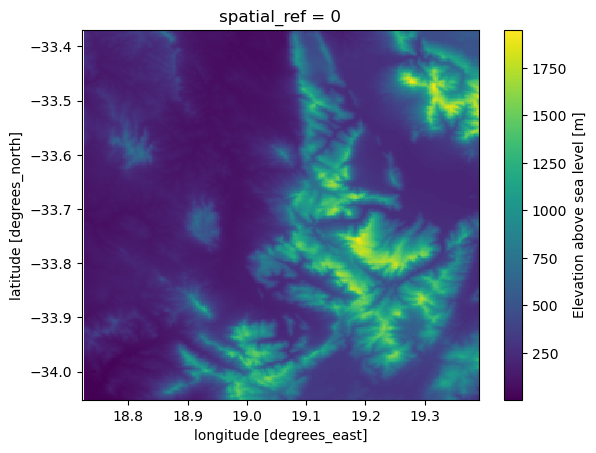

In [9]:
# XArray datasets are also easy to plot and smart enough to automatically fill in the units and the description of the variable.
ds.z.plot()

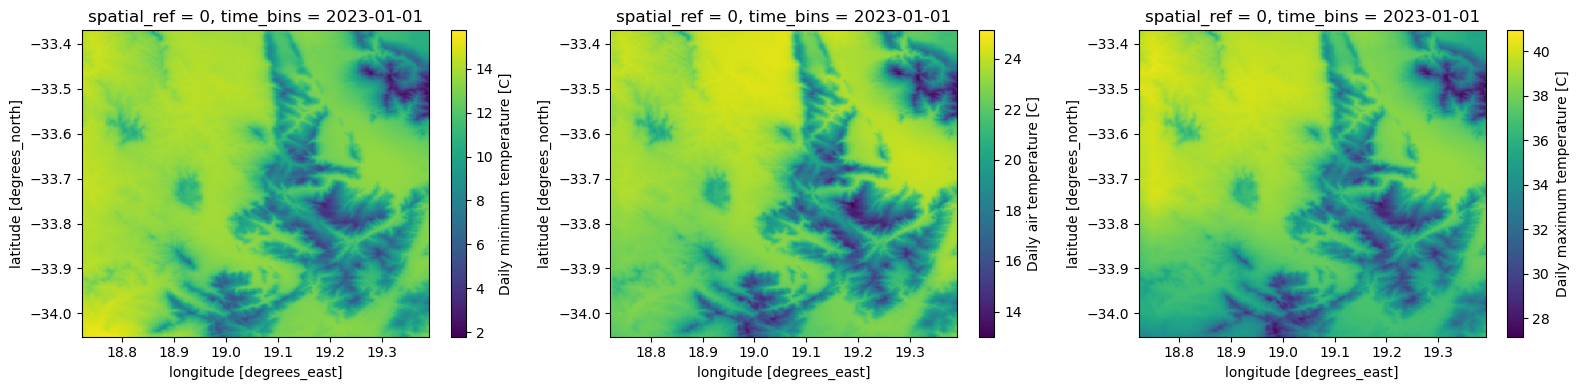

In [10]:
fig, axes = plt.subplots(ncols=3,figsize=(16,4))
# Make a map of a 3-dimensional variable, we will have to select for which time.
ds.t_air_min_24.isel(time_bins = 0).plot(ax=axes[0])
ds.t_air_24.isel(time_bins = 0).plot(ax=axes[1])
ds.t_air_max_24.isel(time_bins = 0).plot(ax=axes[2])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Running the Default ETLook model

### Run ETLook

In [ ]:
ds_out = pywapor.et_look.main(ds)

### ETLook output already created in default project folder

In [11]:
default_etlook_out = os.path.join(default_project_folder, "et_look_out.nc")
default_etlook_out

'/Users/micky/PycharmProjects/hackathon_pywapor/default_pywapor/et_look_out.nc'

In [12]:
# To import the file the dataset is stored in (et_look_out.nc) (if you don't want to run et_look again)
# The decode_coords keyword is used to make sure CRS info is loaded correctly.
ds_out = xr.open_dataset(default_etlook_out, decode_coords = "all")

### Default ETLook outputs

In [13]:
# Check the contents of the new dataset
ds_out

<xarray.Dataset>
Dimensions:       (time_bins: 1, y: 266, x: 261)
Coordinates:
  * x             (x) float64 18.72 18.73 18.73 18.73 ... 19.38 19.39 19.39
  * y             (y) float64 -33.37 -33.37 -33.38 ... -34.05 -34.05 -34.05
    spatial_ref   int64 ...
  * time_bins     (time_bins) datetime64[ns] 2023-01-01
Data variables:
    int_mm        (time_bins, y, x) float64 ...
    t_24_mm       (time_bins, y, x) float64 ...
    e_24_mm       (time_bins, y, x) float64 ...
    et_24_mm      (time_bins, y, x) float64 ...
    et_ref_24_mm  (time_bins, y, x) float64 ...
    se_root       (time_bins, y, x) float64 ...
    npp           (time_bins, y, x) float64 ...

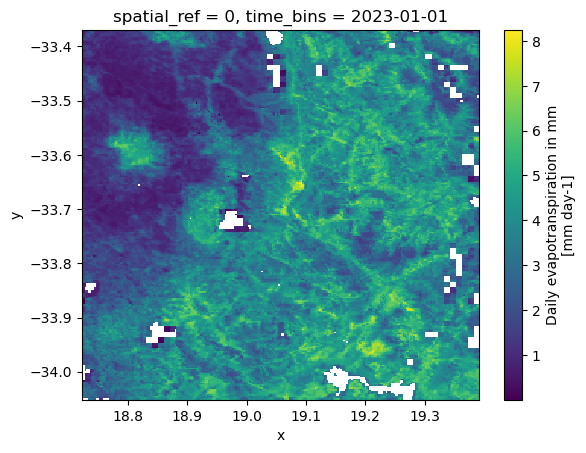

In [14]:
# Plot the daily evapotranspiration in mm
ds_out.et_24_mm.isel(time_bins = 0).plot()

In [15]:
# Note these calculations loads the array into working memory
et_data = ds_out.et_24_mm.isel(time_bins = 0).values
print("resolution:", et_data.shape)
print("total pixels:", et_data.size)
print("number of pixels with missing data:", np.sum(np.isnan(et_data)))
print("maximum value: {0:.2f}".format(np.nanmax(et_data)))
print("minimum value: {0:.2f}".format(np.nanmin(et_data)))
print("mean: {0:.2f}".format(np.nanmean(et_data)))
print("median: {0:.2f}".format(np.nanmedian(et_data)))

resolution: (266, 261)
total pixels: 69426
number of pixels with missing data: 1861
maximum value: 8.24
minimum value: 0.00
mean: 3.36
median: 3.53


# CUSTOM ETLook

## Loading single or multiple GeoTIFF files into a single xarray.Dataset

Help from: https://docs.dea.ga.gov.au/notebooks/How_to_guides/Opening_GeoTIFFs_NetCDFs.html

Citation:
Krause, C., Dunn, B., Bishop-Taylor, R., Adams, C., Burton, C., Alger, M., Chua, S., Phillips, C., Newey, V., Kouzoubov,
K., Leith, A., Ayers, D., Hicks, A., DEA Notebooks contributors 2021. Digital Earth Australia notebooks and tools 
repository. Geoscience Australia, Canberra. https://doi.org/10.26186/145234

In [16]:
# loading a single GeoTIFF file with one band as an xarray.Dataset
def single_load_one_band_geotiff_to_xdataset_static(file_path: str, variable_name: str):
    
    # Open into an xarray.DataArray
    geotiff_da = rioxarray.open_rasterio(file_path)

    # Convert our xarray.DataArray into a xarray.Dataset
    geotiff_ds = geotiff_da.to_dataset('band')

    # Rename the variable to a more useful name
    geotiff_ds = geotiff_ds.rename({1: variable_name})
    
    return geotiff_ds

# loading multiple one band GeoTIFF files as an xarray.Dataset along the time dimension
def multiple_load_one_band_geotiffs_to_xdataset(geotiffs_list: list, variable_name: str, string_slice: tuple = (0,10)):
    date_strings = [os.path.basename(i)[slice(*string_slice)] for i in geotiffs_list]
    datetime = pd.to_datetime(date_strings)

    # Create variable used for time axis
    time_var = xr.Variable('time', datetime)

    # Load in and concatenate all individual GeoTIFFs
    geotiffs_da = xr.concat([rioxarray.open_rasterio(i) for i in geotiffs_list], dim=time_var)

    # Convert our xarray.DataArray into a xarray.Dataset
    geotiffs_ds = geotiffs_da.to_dataset('band')

    # Rename the variable to a more useful name
    geotiffs_ds = geotiffs_ds.rename({1: variable_name})
    
    return geotiffs_ds

# loading multiple one band GeoTIFF files as an xarray.Dataset along the time dimension that represents a composite
def composite_load_one_band_geotiffs_to_xdataset(geotiffs_list: list, variable_name: str, string_slice: tuple = (0,10)):
    date_strings = [os.path.basename(i)[slice(*string_slice)] for i in geotiffs_list]
    datetime = pd.to_datetime(date_strings)

    # Create variable used for time axis
    time_var = xr.Variable('time_bins', datetime)

    # Load in and concatenate all individual GeoTIFFs
    geotiffs_da = xr.concat([rioxarray.open_rasterio(i) for i in geotiffs_list], dim=time_var)

    # Convert our xarray.DataArray into a xarray.Dataset
    geotiffs_ds = geotiffs_da.to_dataset('band')

    # Rename the variable to a more useful name
    geotiffs_ds = geotiffs_ds.rename({1: variable_name})
    
    return geotiffs_ds

# select the required date range
def select_time_range(dataset: xr.Dataset, start_time: str, end_time: str, var_time: str = "time"):
    # Sort the time variable and select the required date range
    dataset_sorted = dataset.sortby(var_time)
    dataset_sorted_timelim = dataset_sorted.sel(**{var_time: slice(start_time, end_time)})
    
    return dataset_sorted_timelim

# reproject and clip to match a given xarray.Datsets extent
def reproject_and_clip(dataset: xr.Dataset, long_lim: list, lat_lim: list, crs: str, ds_extent :xr.Dataset):
    
    # Reproject
    dataset_reproject = dataset.rio.reproject_match(ds_extent)
    
    # Clip to the bounding box
    dataset_reproject_clip = dataset_reproject.rio.clip_box(
        minx= long_lim[0],
        miny= lat_lim[0],
        maxx= long_lim[1],
        maxy= lat_lim[1],
        crs=crs,
    )
    
    return dataset_reproject_clip

In [17]:
# Default extent
default_extent_geotiff = os.path.join(custom_data_folder, "Extent/250m_Extent_WGS84.tif")
default_extent_ds = single_load_one_band_geotiff_to_xdataset_static(default_extent_geotiff, 'extent')
default_extent_ds

<xarray.Dataset>
Dimensions:      (y: 275, x: 270)
Coordinates:
  * x            (x) float64 18.72 18.73 18.73 18.73 ... 19.38 19.38 19.39 19.39
  * y            (y) float64 -33.37 -33.37 -33.38 ... -34.04 -34.05 -34.05
    spatial_ref  int64 0
Data variables:
    extent       (y, x) float32 ...
Attributes:
    AREA_OR_POINT:       Area
    DataType:            Generic
    RepresentationType:  ATHEMATIC
    scale_factor:        1.0
    add_offset:          0.0

### Custom netCDF Files

In [18]:
meteo_file = os.path.join(data_custom_netcdf_folder, "custom_meteo.nc")
surface_albedo_file = os.path.join(data_custom_netcdf_folder, "custom_surface_albedo.nc")
ndvi_file = os.path.join(data_custom_netcdf_folder, "custom_ndvi.nc")
p_file = os.path.join(data_custom_netcdf_folder, "custom_p.nc")
ra_file = os.path.join(data_custom_netcdf_folder, "custom_ra.nc")
lst_file = os.path.join(data_custom_netcdf_folder, "custom_lst.nc")
wind_speed_file = os.path.join(data_custom_netcdf_folder, "custom_u.nc")

### Air Temperature + Humidity

In [ ]:
# Make a list of all the GeoTIFFS in the folder
temp_max_geotiffs_list = glob.glob(os.path.join(air_temp_max_folder, "*.tif"))
temp_min_geotiffs_list = glob.glob(os.path.join(air_temp_min_folder, "*.tif"))
temp_mean_geotiffs_list = glob.glob(os.path.join(air_temp_mean_folder, "*.tif"))
#qv_geotiffs_list = glob.glob(os.path.join(humid_folder, "*.tif"))
print('# of temp_max files', len(temp_max_geotiffs_list))
print('# of temp_min files', len(temp_min_geotiffs_list))
print('# of temp_mean files', len(temp_mean_geotiffs_list))
#print('# of qv files', len(qv_geotiffs_list))

# Convert GeoTIFF to xr.Dataset
tempmax_geotiffs_ds = multiple_load_one_band_geotiffs_to_xdataset(temp_max_geotiffs_list, "t_air_max")
tempmin_geotiffs_ds = multiple_load_one_band_geotiffs_to_xdataset(temp_min_geotiffs_list, "t_air_min")
tempmean_geotiffs_ds = multiple_load_one_band_geotiffs_to_xdataset(temp_mean_geotiffs_list, "t_air")
#qv_geotiffs_ds = multiple_load_one_band_geotiffs_to_xdataset(qv_geotiffs_list, "qv")

# Select the time range
tempmax_geotiffs_ds_timelim = select_time_range(tempmax_geotiffs_ds, timelim[0], timelim[1])
tempmin_geotiffs_ds_timelim = select_time_range(tempmin_geotiffs_ds, timelim[0], timelim[1])
tempmean_geotiffs_ds_timelim = select_time_range(tempmean_geotiffs_ds, timelim[0], timelim[1])
#qv_geotiffs_ds_timelim = select_time_range(qv_geotiffs_ds, timelim[0], timelim[1])

# Reproject the xr.Dataset to match the extent
tempmax_geotiffs_ds_timelim_clip_reproject = reproject_and_clip(tempmax_geotiffs_ds_timelim, lonlim, latlim, project_crs, default_extent_ds)
tempmin_geotiffs_ds_timelim_clip_reproject = reproject_and_clip(tempmin_geotiffs_ds_timelim, lonlim, latlim, project_crs, default_extent_ds)
tempmean_geotiffs_ds_timelim_clip_reproject = reproject_and_clip(tempmean_geotiffs_ds_timelim, lonlim, latlim, project_crs, default_extent_ds)
#qv_geotiffs_ds_timelim_clip_reproject = reproject_and_clip(qv_geotiffs_ds_timelim, lonlim, latlim, project_crs, default_extent_ds)

main_meteo_ds = xr.Dataset()
main_meteo_ds["t_air"] = tempmean_geotiffs_ds_timelim_clip_reproject.t_air
main_meteo_ds["t_air_min"] = tempmin_geotiffs_ds_timelim_clip_reproject.t_air_min
main_meteo_ds["t_air_max"] = tempmax_geotiffs_ds_timelim_clip_reproject.t_air_max
#main_meteo_ds["qv"] = qv_geotiffs_ds_timelim_clip_reproject.qv

# Save to a netCDF file
view_main_meteo = pywapor.general.processing_functions.save_ds(
    main_meteo_ds, 
    meteo_file, 
    encoding="initiate", 
    label="Saving custom meteo variables")

view_main_meteo.info()

### Test if meteo was loaded correctly

In [ ]:
test_meteo_ds = xr.open_dataset(meteo_file, decode_coords = "all")
test_meteo_ds

In [ ]:
fig, axes = plt.subplots(ncols=3,figsize=(16,4))
# Make a map of a 3-dimensional variable, we will have to select for which time.
test_meteo_ds.t_air_min.isel(time = 0).plot(ax=axes[0])
test_meteo_ds.t_air.isel(time = 0).plot(ax=axes[1])
test_meteo_ds.t_air_max.isel(time = 0).plot(ax=axes[2])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#test_meteo_ds.qv.isel(time=9).plot()

### Surface Albedo + NDVI

In [ ]:
# Make a list of all the GeoTIFFS in the folder
r0_geotiffs_list = glob.glob(os.path.join(surface_albedo_folder, "*.tif"))
print('# of surface_albedo files', len(r0_geotiffs_list))

# Convert GeoTIFF to xr.Dataset
r0_geotiffs_ds = composite_load_one_band_geotiffs_to_xdataset(r0_geotiffs_list, "r0")

# Select the time range
r0_geotiffs_ds_timelim = select_time_range(r0_geotiffs_ds, timelim[0], timelim[1], var_time ="time_bins")

# Save to a netCDF file
view_main_r0 = pywapor.general.processing_functions.save_ds(
    r0_geotiffs_ds_timelim, 
    surface_albedo_file, 
    encoding="initiate", 
    label="Saving custom surface albedo variables")

view_main_r0.info()

### Test if r0 was loaded correctly

In [ ]:
test_r0_ds = xr.open_dataset(surface_albedo_file, decode_coords = "all")
test_r0_ds

In [ ]:
test_r0_ds.r0.isel(time_bins=0).plot()

In [ ]:
# Make a list of all the GeoTIFFS in the folder
ndvi_geotiffs_list = glob.glob(os.path.join(ndvi_folder, "*.tif"))
print('# of ndvi files', len(ndvi_geotiffs_list))

# Convert GeoTIFF to xr.Dataset
ndvi_geotiffs_ds = composite_load_one_band_geotiffs_to_xdataset(ndvi_geotiffs_list, "ndvi")

# Select the time range
ndvi_geotiffs_ds_timelim = select_time_range(ndvi_geotiffs_ds, timelim[0], timelim[1], var_time ="time_bins")

# Save to a netCDF file
view_main_ndvi = pywapor.general.processing_functions.save_ds(
    ndvi_geotiffs_ds_timelim, 
    ndvi_file, 
    encoding="initiate", 
    label="Saving custom NDVI variables")

view_main_ndvi.info()

### Test if ndvi was loaded correctly

In [ ]:
test_ndvi_ds = xr.open_dataset(ndvi_file, decode_coords = "all")
test_ndvi_ds

In [ ]:
test_ndvi_ds.ndvi.isel(time_bins=0).plot()

### Precipitation + Solar Radiation

In [ ]:
# Make a list of all the GeoTIFFS in the folder
p_geotiffs_list = glob.glob(os.path.join(rainfall_folder, "*.tif"))
print('# rainfall of files', len(p_geotiffs_list))

# Convert GeoTIFF to xr.Dataset
p_geotiffs_ds = multiple_load_one_band_geotiffs_to_xdataset(p_geotiffs_list, "p")

# Select the time range
p_geotiffs_ds_timelim = select_time_range(p_geotiffs_ds, timelim[0], timelim[1])

# Reproject the xr.Dataset to match the extent
p_geotiffs_ds_timelim_clip_reproject = reproject_and_clip(p_geotiffs_ds_timelim, lonlim, latlim, project_crs, default_extent_ds)

# Save to a netCDF file
view_p_meteo = pywapor.general.processing_functions.save_ds(
    p_geotiffs_ds_timelim_clip_reproject, 
    p_file, 
    encoding="initiate", 
    label="Saving custom rainfall variables")

view_p_meteo.info()

### Test if precipitation was loaded correctly

In [ ]:
test_p_ds = xr.open_dataset(p_file, decode_coords = "all")
test_p_ds

In [ ]:
test_p_ds.p.isel(time=0).plot()

In [ ]:
# Make a list of all the GeoTIFFS in the folder
ra_geotiffs_list = glob.glob(os.path.join(solar_rad_folder, "*.tif"))
print('# of solar radiation files', len(ra_geotiffs_list))

# Convert GeoTIFF to xr.Dataset
ra_geotiffs_ds = multiple_load_one_band_geotiffs_to_xdataset(ra_geotiffs_list, "ra")

# Select the time range
ra_geotiffs_ds_timelim = select_time_range(ra_geotiffs_ds, timelim[0], timelim[1])

# Reproject the xr.Dataset to match the extent
ra_geotiffs_ds_timelim_clip_reproject = reproject_and_clip(ra_geotiffs_ds_timelim, lonlim, latlim, project_crs, default_extent_ds)

# Save to a netCDF file
view_ra_meteo = pywapor.general.processing_functions.save_ds(
    ra_geotiffs_ds_timelim_clip_reproject , 
    ra_file, 
    encoding="initiate", 
    label="Saving custom solar radiation variables")

view_ra_meteo.info()

### Test if solar radiation was loaded correctly

In [31]:
test_ra_ds = xr.open_dataset(ra_file, decode_coords = "all")
test_ra_ds

<xarray.Dataset>
Dimensions:      (x: 270, y: 275, time: 10)
Coordinates:
  * x            (x) float64 18.72 18.73 18.73 18.73 ... 19.38 19.38 19.39 19.39
  * y            (y) float64 -33.37 -33.37 -33.38 ... -34.04 -34.05 -34.05
  * time         (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-01-10
    spatial_ref  int64 ...
Data variables:
    ra           (time, y, x) float64 ...
Attributes:
    AREA_OR_POINT:       Area
    DataType:            Generic
    RepresentationType:  ATHEMATIC
    _FillValue:          -3.4028235e+38
    scale_factor:        1.0
    add_offset:          0.0

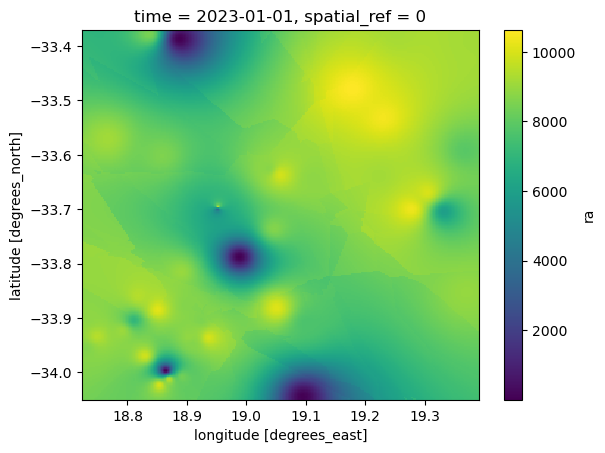

In [34]:
test_ra_ds.ra.isel(time=0).plot()

### Land Surface Temperature (used in se_root model)

In [ ]:
# Make a list of all the GeoTIFFS in the folder
lst_geotiffs_list = glob.glob(os.path.join(lst_folder, "*.tif"))
print('# of solar radiation files', len(lst_geotiffs_list))

# Convert GeoTIFF to xr.Dataset
lst_geotiffs_ds = multiple_load_one_band_geotiffs_to_xdataset(lst_geotiffs_list, "lst")

# Select the time range
lst_geotiffs_ds_timelim = select_time_range(lst_geotiffs_ds, timelim[0], timelim[1])

# Reproject the xr.Dataset to match the extent
lst_geotiffs_ds_timelim_clip_reproject = reproject_and_clip(lst_geotiffs_ds_timelim, lonlim, latlim, project_crs, default_extent_ds)

# Save to a netCDF file
view_lst_meteo = pywapor.general.processing_functions.save_ds(
    lst_geotiffs_ds_timelim_clip_reproject , 
    lst_file, 
    encoding="initiate", 
    label="Saving custom land surface temp variables")

view_lst_meteo.info()

### Test if LST was loaded correctly

In [ ]:
test_lst_ds = xr.open_dataset(lst_file, decode_coords = "all")
test_lst_ds

In [ ]:
test_lst_ds.lst.isel(time=0).plot()

###  Create a wind speed composite due to u_24 not appearing in the Level_1 dictionary (only includes u_24 components u2m and v2m)

In [ ]:
# composite wind speed

# Make a list of all the GeoTIFFS in the folder
u_24_geotiffs_list = glob.glob(os.path.join(wind_speed_folder, "composites/*.tif"))
print('# of ndvi files', len(u_24_geotiffs_list))

# Convert GeoTIFF to xr.Dataset
u_24_geotiffs_ds = composite_load_one_band_geotiffs_to_xdataset(u_24_geotiffs_list, "u_24")

# Select the time range
u_24_geotiffs_ds_timelim = select_time_range(u_24_geotiffs_ds, timelim[0], timelim[1], var_time ="time_bins")

# Save to a netCDF file
view_main_u_24 = pywapor.general.processing_functions.save_ds(
    u_24_geotiffs_ds_timelim, 
    wind_speed_file, 
    encoding="initiate", 
    label="Saving custom wind speed composite variables")

view_main_u_24.info()

### Test if wind speed median composite was loaded correctly

In [ ]:
test_u_24_ds = xr.open_dataset(wind_speed_file, decode_coords = "all")
test_u_24_ds

In [ ]:
test_u_24_ds.u_24.isel(time_bins=0).plot()

## SIDELOADING METHOD 1

In [35]:
# Start by loading a defualt configuration for pre_et_look and pre_se_root
et_look_config = pywapor.general.levels.pre_et_look_levels(level = "level_1")
se_root_config = pywapor.general.levels.pre_se_root_levels(level = "level_1")

In [36]:
# Create a list of variables
# TODO: Find out more about the calculation of specific humidity
#meteo_vars = ['t_air_max', 't_air_min', 't_air', 'qv']
meteo_vars = ['t_air_max', 't_air_min', 't_air']

# Only et_look_config
p_vars = ['p']
ra_vars = ['ra']

# Only se_root_config
lst_vars = ['lst']

In [37]:
# Step 1: Define a function that can return the dataset
# Note the **kwargs is added to discard the other arguments that are not used in this (very simple) function.
def meteo_sideload(**kwargs):
    meteo_netcdf_file = os.path.join(data_custom_netcdf_folder, "custom_meteo.nc")
    meteo_ds = xr.open_dataset(meteo_netcdf_file)
    return meteo_ds

def precip_sideload(**kwargs):
    p_netcdf_file = os.path.join(data_custom_netcdf_folder, "custom_p.nc")
    p_ds = xr.open_dataset(p_netcdf_file)
    return p_ds

def ra_sideload(**kwargs):
    ra_netcdf_file = os.path.join(data_custom_netcdf_folder, "custom_ra.nc")
    ra_ds = xr.open_dataset(ra_netcdf_file)
    return ra_ds

def lst_sideload(**kwargs):
    lst_netcdf_file = os.path.join(data_custom_netcdf_folder, "custom_lst.nc")
    lst_ds = xr.open_dataset(lst_netcdf_file)
    return lst_ds

In [38]:
# Step 2: Put it inside the configuration for each variable.
meteo_config = [{"source": meteo_sideload, "product_name": "CUSTOM_METEO", "enhancers": [], 'is_example': True}]
for var in meteo_vars:
    et_look_config[var]["products"] = meteo_config
    se_root_config[var]["products"] = meteo_config
    
precip_config = [{"source": precip_sideload, "product_name": "CUSTOM_PRECIP", "enhancers": [] }]
for var in p_vars:
    et_look_config[var]["products"] = precip_config
    
lst_config = [{"source": lst_sideload, "product_name": "CUSTOM_LST", "enhancers": [] }]
for var in lst_vars:
    se_root_config[var]["products"] = lst_config

In [39]:
ra_config = [{"source": ra_sideload, "product_name": "CUSTOM_SOLAR_RAD", "enhancers": [] }]
for var in ra_vars:
    et_look_config[var]["products"] = ra_config

In [40]:
# Pass the adjusted se_root_config to et_look_config
se_root_dler = partial(se_root.se_root, sources = se_root_config)
et_look_config["se_root"]["products"][0]["source"] = se_root_dler

In [41]:
# Now the configuration for "se_root" has been updated too
et_look_config["se_root"]

{'products': [{'source': functools.partial(<function se_root at 0x15ebdae80>, sources={'ndvi': {'products': [{'source': 'MODIS', 'product_name': 'MOD13Q1.061', 'enhancers': 'default', 'is_example': True}, {'source': 'MODIS', 'product_name': 'MYD13Q1.061', 'enhancers': 'default'}], 'temporal_interp': 'linear', 'spatial_interp': 'nearest'}, 'lst': {'products': [{'source': <function lst_sideload at 0x2988a5580>, 'product_name': 'CUSTOM_LST', 'enhancers': []}], 'temporal_interp': None, 'spatial_interp': 'nearest'}, 't_air': {'products': [{'source': <function meteo_sideload at 0x2988a5a80>, 'product_name': 'CUSTOM_METEO', 'enhancers': [], 'is_example': True}], 'temporal_interp': 'linear', 'spatial_interp': 'bilinear'}, 't_air_max': {'products': [{'source': <function meteo_sideload at 0x2988a5a80>, 'product_name': 'CUSTOM_METEO', 'enhancers': [], 'is_example': True}], 'temporal_interp': 'linear', 'spatial_interp': 'bilinear'}, 't_air_min': {'products': [{'source': <function meteo_sideload at

### Custom ETLook Input

## SIDELOADING METHOD 2

In [42]:
meteo_vars = ['ndvi', 'r0']

for var in meteo_vars:
    _ = et_look_config.pop(var, None)

In [43]:
# Finally we can start pre_et_look as usual
# Disable lapse correction
custom_input_ds = pywapor.pre_et_look.main(custom_project_folder, latlim, lonlim, timelim, bin_length=composite_length, sources = et_look_config, enhancers = [])

                > PRE_ET_LOOK
                    --> Collecting `p` from `precip_sideload.CUSTOM_PRECIP`.
                            > timesize: 10 [2023-01-01T00:00, ..., 2023-01-10T00:00]
                    --> Collecting `z` from `SRTM.30M`.
                            > timesize: 1 [2000-02-11T00:00, ..., 2000-02-11T00:00]
                    --> Collecting `ra` from `ra_sideload.CUSTOM_SOLAR_RAD`.
                            > timesize: 10 [2023-01-01T00:00, ..., 2023-01-10T00:00]
                    --> Collecting `t_air`, `t_air_max`, `t_air_min` from `meteo_sideload.CUSTOM_METEO`.
                            > timesize: 10 [2023-01-01T00:00, ..., 2023-01-10T00:00]
                    --> Collecting `u2m`, `v2m`, `qv`, `p_air`, `p_air_0`, `wv` from `GEOS5.inst3_2d_asm_Nx`.
                        --> Downloading data.
                            > peak-memory-usage: 1.2MB, execution-time: 0:00:36.249364.
                            > chunksize|dimsize: [time: 129|129, y: 5|5,

                            --> Selected `reproject_chunk` for reprojection of p_air_0_i.nc.
                                --> Warping VRT to netCDF.
                                    > peak-memory-usage: 6.2KB, execution-time: 0:00:00.096623.
                                --> Saving reprojected data from p_air_0_i.nc:p_air_0 (bilinear).
                                    > peak-memory-usage: 45.8MB, execution-time: 0:00:02.142453.
                                    > chunksize|dimsize: [time: 10|10, y: 349|349, x: 344|344]
                            --> Selected `reproject_chunk` for reprojection of qv_i.nc.
                                --> Warping VRT to netCDF.
                                    > peak-memory-usage: 6.1KB, execution-time: 0:00:00.092885.
                                --> Saving reprojected data from qv_i.nc:qv (bilinear).
                                    > peak-memory-usage: 45.8MB, execution-time: 0:00:02.123944.
                                  

                            --> Calculating `psi_m`.
                            --> Calculating `psi_h`.
                            --> Calculating `aerodynamical_resistance_forced_convection_full`.
                            --> Calculating `psi_m`.
                            --> Calculating `psi_m`.
                            --> Calculating `psi_h`.
                            --> Calculating `psi_h`.
                            --> Calculating `maximum_temperature_bare`.
                            --> Calculating `maximum_temperature_full`.
                            --> Calculating `wet_bulb_temperature_inst_new`.
                            --> Calculating `maximum_temperature`.
                            --> Calculating `wet_bulb_temperature_kelvin_inst`.
                            --> Calculating `air_temperature_kelvin`.
                            --> Calculating `minimum_temperature`.
                            --> Calculating `soil_moisture_from_maximum_temperatur

                            --> Saving `t_amp_year` composites.
                                > peak-memory-usage: 12.1MB, execution-time: 0:00:02.069230.
                                > chunksize|dimsize: [y: 349|349, x: 344|344]
                        --> (23/24) Compositing `t_opt` (None).
                            --> Saving `t_opt` composites.
                                > peak-memory-usage: 12.1MB, execution-time: 0:00:02.070797.
                                > chunksize|dimsize: [y: 349|349, x: 344|344]
                        --> (24/24) Compositing `vpd_slope` (None).
                            --> Saving `vpd_slope` composites.
                                > peak-memory-usage: 12.1MB, execution-time: 0:00:02.069600.
                                > chunksize|dimsize: [y: 349|349, x: 344|344]
                    --> Using `custom_meteo.nc` as reprojecting example.
                        > shape: (275, 270), res: 0.0025° x 0.0025°.
                    --> Sel

                    --> Selected `reproject_chunk` for reprojection of rn_slope_bin.nc.
                        --> Warping VRT to netCDF.
                            > peak-memory-usage: 5.8KB, execution-time: 0:00:00.026241.
                        --> Saving reprojected data from rn_slope_bin.nc:rn_slope (bilinear).
                            > peak-memory-usage: 2.3MB, execution-time: 0:00:02.069825.
                            > chunksize|dimsize: [y: 275|275, x: 270|270]
                    --> Selected `reproject_chunk` for reprojection of t_amp_year_bin.nc.
                        --> Warping VRT to netCDF.
                            > peak-memory-usage: 5.8KB, execution-time: 0:00:00.026613.
                        --> Saving reprojected data from t_amp_year_bin.nc:t_amp_year (bilinear).
                            > peak-memory-usage: 2.3MB, execution-time: 0:00:02.072731.
                            > chunksize|dimsize: [y: 275|275, x: 270|270]
                    --> Sele

### Load custom pre_et_look if it already exists

In [ ]:
custom_fh = os.path.join(custom_project_folder, "et_look_in.nc")
custom_input_ds = xr.open_dataset(custom_fh, decode_coords = "all")

In [44]:
# Add the composite values to the pre_et_look dataset
custom_ndvi_ds = xr.open_dataset(ndvi_file, decode_coords = "all")
custom_ndvi_ds_reproject = reproject_and_clip(custom_ndvi_ds, lonlim, latlim, project_crs, custom_input_ds)

custom_r0_ds = xr.open_dataset(surface_albedo_file, decode_coords = "all")
custom_r0_ds_reproject = reproject_and_clip(custom_r0_ds, lonlim, latlim, project_crs, custom_input_ds)

custom_u_24_ds = xr.open_dataset(wind_speed_file, decode_coords = "all")
custom_u_24_ds_reproject = reproject_and_clip(custom_u_24_ds, lonlim, latlim, project_crs, custom_input_ds)


In [45]:
custom_input_ds["ndvi"] = custom_ndvi_ds_reproject.ndvi
custom_input_ds["r0"] = custom_r0_ds_reproject.r0
custom_input_ds["u_24"] = custom_u_24_ds_reproject.u_24

### Compare default and custom pre_et_look datasets

In [46]:
custom_input_ds

<xarray.Dataset>
Dimensions:              (time_bins: 1, y: 275, x: 270)
Coordinates:
  * y                    (y) float64 -33.37 -33.37 -33.38 ... -34.05 -34.05
  * x                    (x) float64 18.72 18.73 18.73 ... 19.38 19.39 19.39
  * time_bins            (time_bins) datetime64[ns] 2023-01-01
    spatial_ref          int64 ...
Data variables: (12/78)
    se_root              (time_bins, y, x) float64 dask.array<chunksize=(1, 275, 270), meta=np.ndarray>
    p_24                 (time_bins, y, x) float64 dask.array<chunksize=(1, 275, 270), meta=np.ndarray>
    z                    (y, x) float64 dask.array<chunksize=(275, 270), meta=np.ndarray>
    ra_24                (time_bins, y, x) float64 dask.array<chunksize=(1, 275, 270), meta=np.ndarray>
    t_air_24             (time_bins, y, x) float64 dask.array<chunksize=(1, 275, 270), meta=np.ndarray>
    t_air_max_24         (time_bins, y, x) float64 dask.array<chunksize=(1, 275, 270), meta=np.ndarray>
    ...                   ...
    phot_eff             float64 ...
    r0_bare              float64 ...
    r0_full              float64 ...
    ndvi                 (time_bins, y, x) float64 0.215 0.2183 ... 0.7387
    r0                   (time_bins, y, x) float64 0.2236 0.2218 ... 0.1626
    u_24                 (time_bins, y, x) float64 1.168 1.162 ... 1.502 1.502

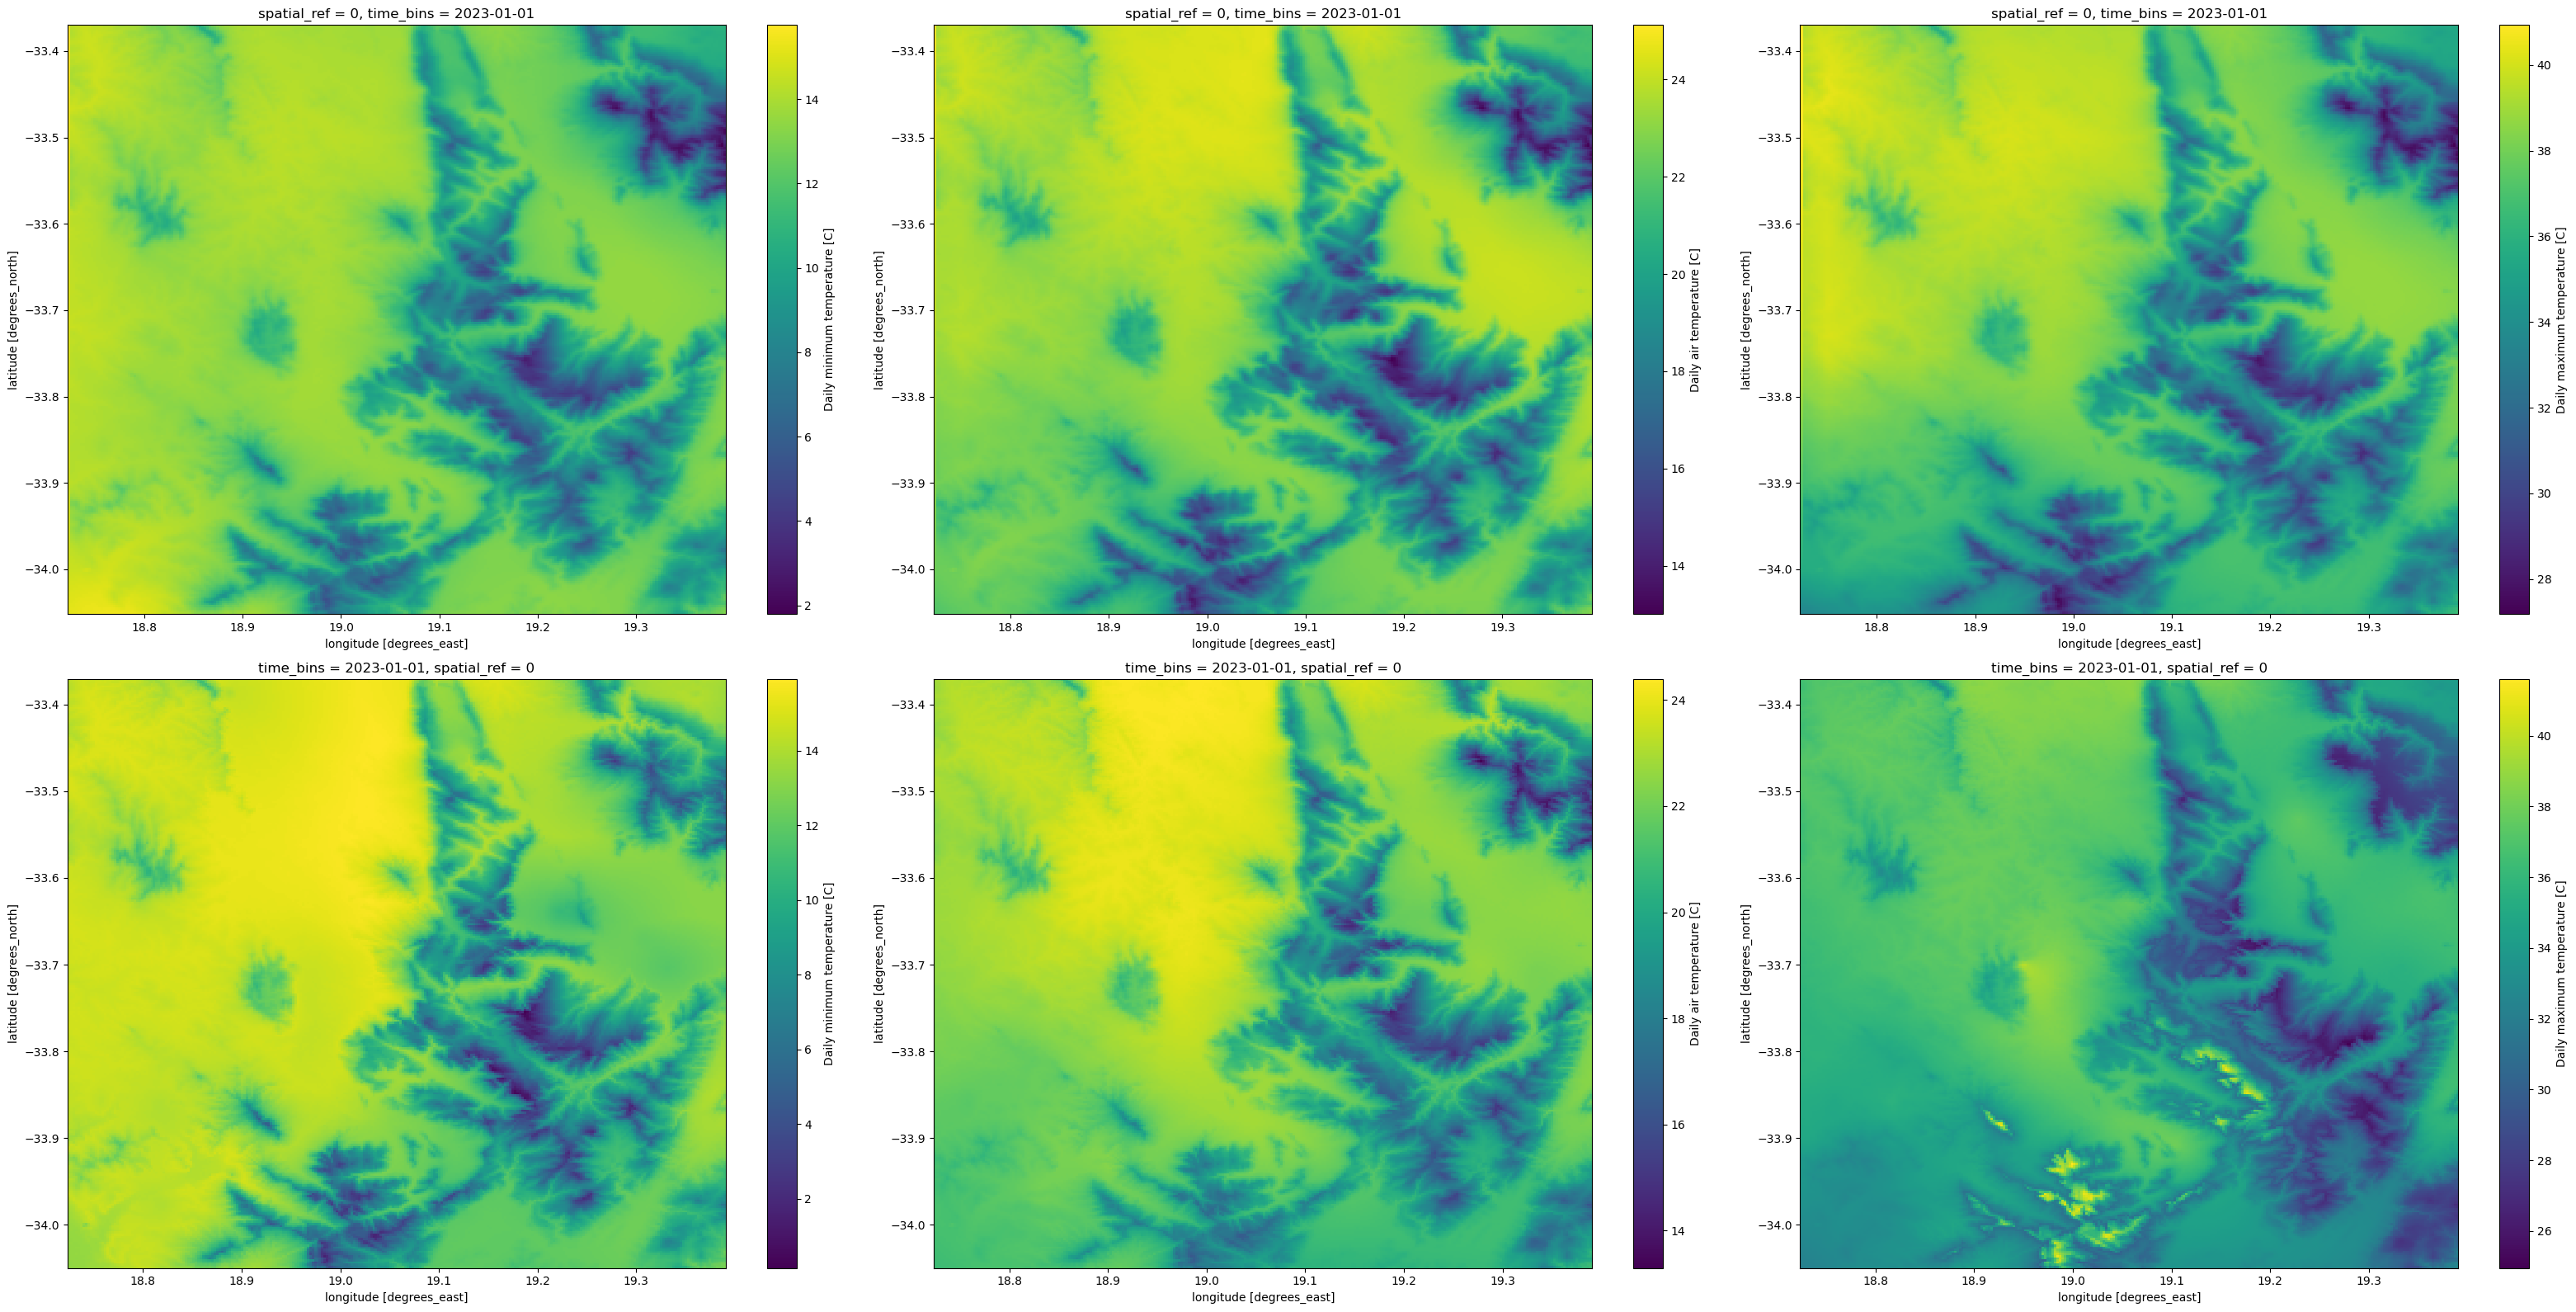

In [47]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(32,16))
# Make a map of a 3-dimensional variable, we will have to select for which time.
ds.t_air_min_24.isel(time_bins = 0).plot(ax=axes[0,0])
ds.t_air_24.isel(time_bins = 0).plot(ax=axes[0,1])
ds.t_air_max_24.isel(time_bins = 0).plot(ax=axes[0,2])

custom_input_ds.t_air_min_24.isel(time_bins=0).plot(ax=axes[1,0])
custom_input_ds.t_air_24.isel(time_bins=0).plot(ax=axes[1,1])
custom_input_ds.t_air_max_24.isel(time_bins=0).plot(ax=axes[1,2])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

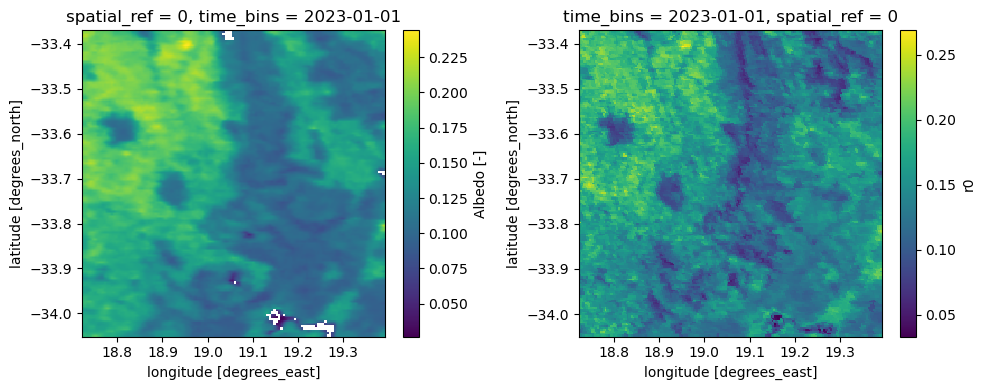

In [48]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
# Make a map of a 3-dimensional variable, we will have to select for which time.
ds.r0.isel(time_bins=0).plot(ax=axes[0])
custom_input_ds.r0.isel(time_bins=0).plot(ax=axes[1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

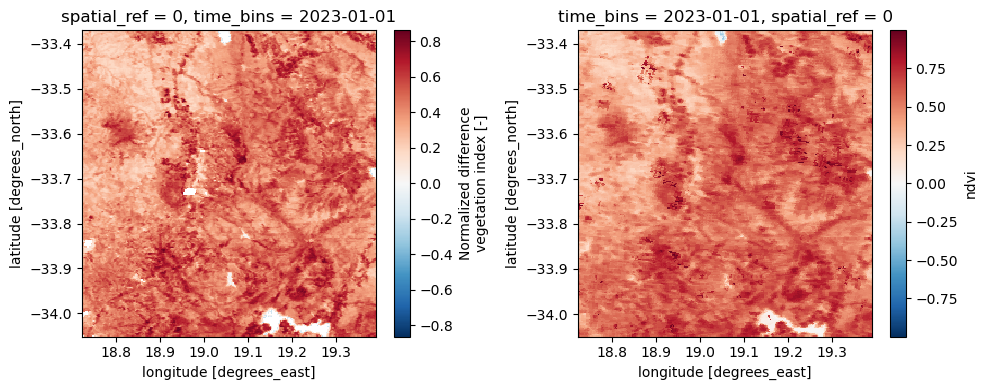

In [49]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
# Make a map of a 3-dimensional variable, we will have to select for which time.
ds.ndvi.isel(time_bins=0).plot(ax=axes[0])
custom_input_ds.ndvi.isel(time_bins=0).plot(ax=axes[1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

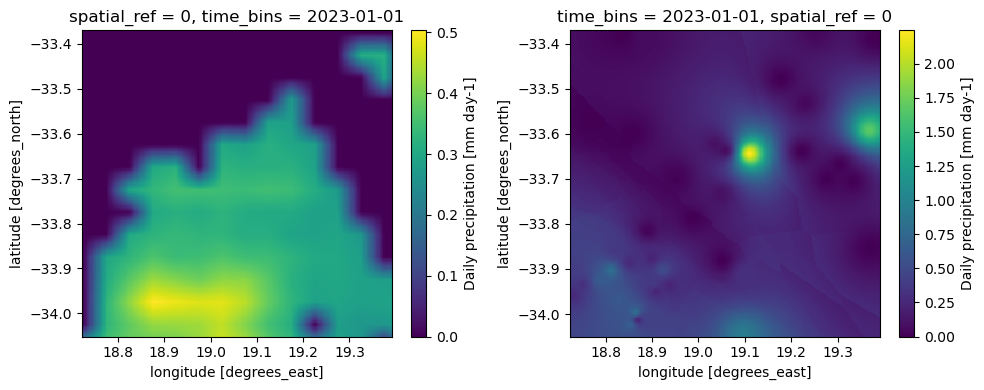

In [50]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
# Make a map of a 3-dimensional variable, we will have to select for which time.
ds.p_24.isel(time_bins=0).plot(ax=axes[0])
custom_input_ds.p_24.isel(time_bins=0).plot(ax=axes[1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

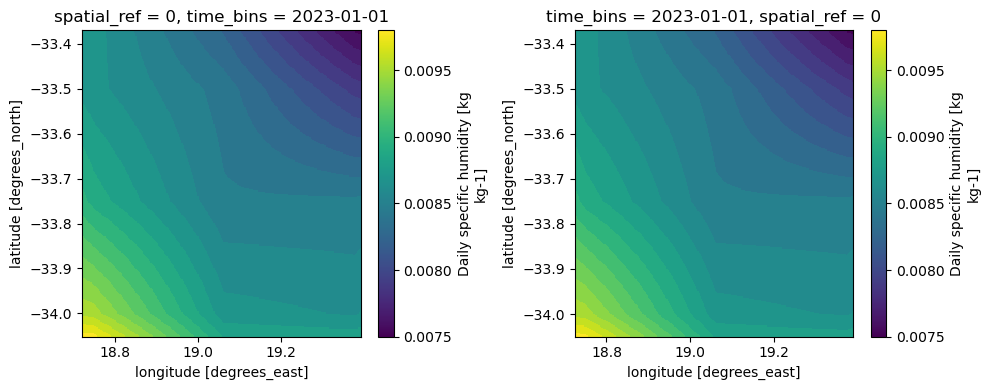

In [51]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
# Make a map of a 3-dimensional variable, we will have to select for which time.
ds.qv_24.isel(time_bins=0).plot(ax=axes[0])
custom_input_ds.qv_24.isel(time_bins=0).plot(ax=axes[1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

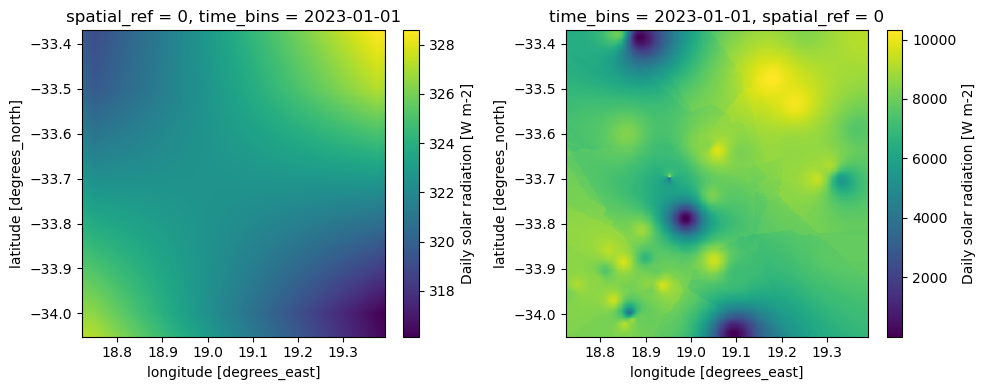

In [52]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
# Make a map of a 3-dimensional variable, we will have to select for which time.
ds.ra_24.isel(time_bins=0).plot(ax=axes[0])
custom_input_ds.ra_24.isel(time_bins=0).plot(ax=axes[1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

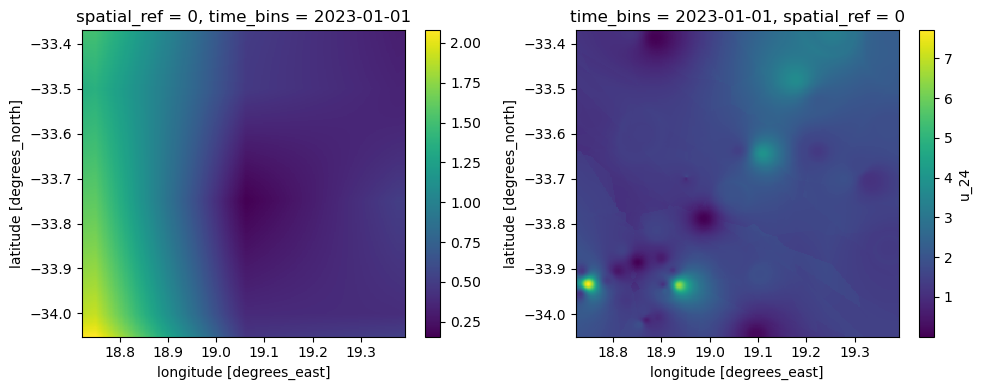

In [53]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
# Make a map of a 3-dimensional variable, we will have to select for which time.
default_wind_speed = np.sqrt(ds["v2m_24"]**2 + ds["u2m_24"]**2)
default_wind_speed.plot(ax=axes[0])

custom_input_ds.u_24.isel(time_bins=0).plot(ax=axes[1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Running Custom ETLook

In [54]:
# Run et_look
custom_output_ds = pywapor.et_look.main(custom_input_ds)

                > ET_LOOK
                    --> Running `et_look` (v2).
                    --> Calculating `declination`.
                    --> Calculating `inverse_earth_sun_distance`.
                    --> Calculating `vegetation_cover`.
                    --> Calculating `leaf_area_index`.
                    --> Calculating `effective_leaf_area_index`.
                    --> Calculating `soil_fraction`.
                    --> Calculating `latitude_rad`.
                    --> Calculating `sunset_hour_angle`.
                    --> Calculating `daily_solar_radiation_toa_flat`.
                    --> Calculating `transmissivity`.
                    --> Calculating `stress_radiation`.
                    --> Calculating `air_pressure_kpa2mbar`.
                    --> Calculating `air_pressure_daily`.
                    --> Calculating `air_pressure`.
                    --> Calculating `vapour_pressure_from_specific_humidity_daily`.
                    --> Calculating 

In [55]:
custom_output_ds

<xarray.Dataset>
Dimensions:       (time_bins: 1, y: 275, x: 270)
Coordinates:
  * y             (y) float64 -33.37 -33.37 -33.38 ... -34.04 -34.05 -34.05
  * x             (x) float64 18.72 18.73 18.73 18.73 ... 19.38 19.39 19.39
  * time_bins     (time_bins) datetime64[ns] 2023-01-01
    spatial_ref   int64 ...
Data variables:
    int_mm        (time_bins, y, x) float64 dask.array<chunksize=(1, 275, 270), meta=np.ndarray>
    t_24_mm       (time_bins, y, x) float64 dask.array<chunksize=(1, 275, 270), meta=np.ndarray>
    e_24_mm       (time_bins, y, x) float64 dask.array<chunksize=(1, 275, 270), meta=np.ndarray>
    et_24_mm      (time_bins, y, x) float64 dask.array<chunksize=(1, 275, 270), meta=np.ndarray>
    et_ref_24_mm  (time_bins, y, x) float64 dask.array<chunksize=(1, 275, 270), meta=np.ndarray>
    se_root       (time_bins, y, x) float64 dask.array<chunksize=(1, 275, 270), meta=np.ndarray>
    npp           (time_bins, y, x) float64 dask.array<chunksize=(1, 275, 270), meta=np.ndarray>

### Compare default and custom et_look datasets

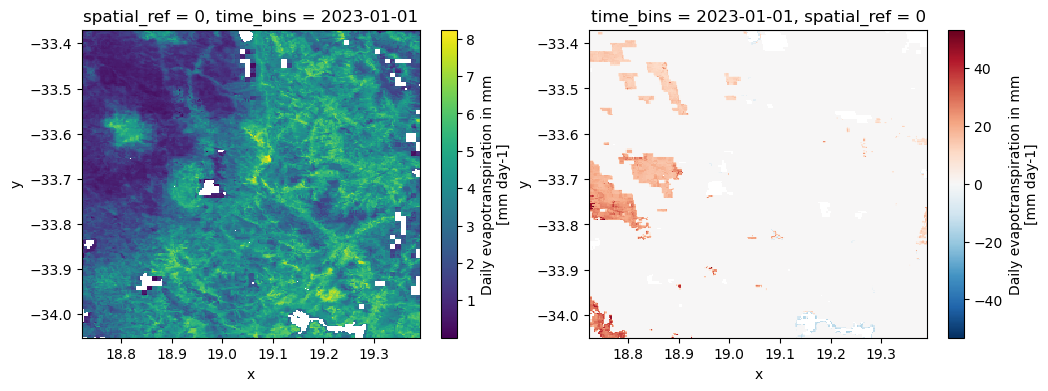

In [56]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4))
# Plot the daily evapotranspiration in mm
ds_out.et_24_mm.isel(time_bins = 0).plot(ax=axes[0])
custom_output_ds.et_24_mm.isel(time_bins = 0).plot(ax=axes[1])

In [57]:
# Note these calculations loads the array into working memory
print("*******************************************************************")
print("***************************   DEFAULT   ***************************")
print("*******************************************************************")
et_data = ds_out.et_24_mm.isel(time_bins = 0).values
print("resolution:", et_data.shape)
print("total pixels:", et_data.size)
print("number of pixels with missing data:", np.sum(np.isnan(et_data)))
print("maximum value: {0:.2f}".format(np.nanmax(et_data)))
print("minimum value: {0:.2f}".format(np.nanmin(et_data)))
print("mean: {0:.2f}".format(np.nanmean(et_data)))
print("median: {0:.2f}".format(np.nanmedian(et_data)))
print("*******************************************************************")
print("***************************   CUSTOM   ****************************")
print("*******************************************************************")
# Note these calculations loads the array into working memory
custom_et_data = custom_output_ds.et_24_mm.isel(time_bins = 0).values
print("resolution:", custom_et_data.shape)
print("total pixels:", custom_et_data.size)
print("number of pixels with missing data:", np.sum(np.isnan(custom_et_data)))
print("maximum value: {0:.2f}".format(np.nanmax(custom_et_data)))
print("minimum value: {0:.2f}".format(np.nanmin(custom_et_data)))
print("mean: {0:.2f}".format(np.nanmean(custom_et_data)))
print("median: {0:.2f}".format(np.nanmedian(custom_et_data)))
print("*******************************************************************")

*******************************************************************
***************************   DEFAULT   ***************************
*******************************************************************
resolution: (266, 261)
total pixels: 69426
number of pixels with missing data: 1861
maximum value: 8.24
minimum value: 0.00
mean: 3.36
median: 3.53
*******************************************************************
***************************   CUSTOM   ****************************
*******************************************************************
resolution: (275, 270)
total pixels: 74250
number of pixels with missing data: 1752
maximum value: 53.26
minimum value: -17.97
mean: 1.16
median: 0.00
*******************************************************************
